# Input the final names into the second block of code (if you changed the names from the FBRef data download file). Then run that block, then input the required info into the first block.
### No need to rerun the 2nd block. Just change the info in the first block and run!

Minutes: 2774 — 78 percentile


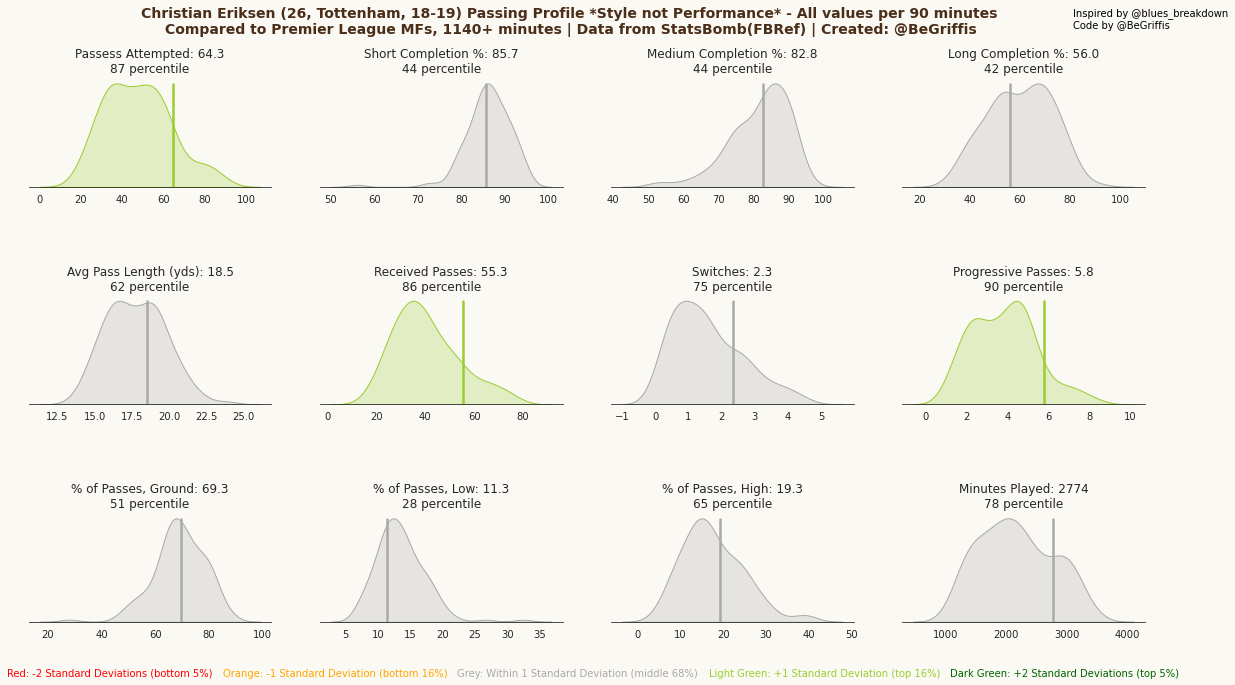

In [2]:
ScoutReport(season = "18-19",               # Season (In the future I'll upload code on my GitHub that will download prior years' data)
            player_pos = "MF",              # Position of player & comparisons (See note below)
            playerPrompt = "Christian Eriksen",  # Player name
            SquadPrompt = "",               # Optional. But Required for players who played for more than one team
            minutesPlayed = (38*90)/3,            # The number of minutes to filter by
            compP = "epl",              # OPTIONS: epl, la liga, bundesliga, serie a, ligue 1 ('n' will be all 5 leagues)
            saveinput = "n",                # 'y' if you want to save figure, 'n' if not
            signature = "@BeGriffis"     # Your handle
           )

##### For before 21-22, just use 'DF', 'MF', 'FW' #####
## I'm working on updating the Transfermarkt positions for prior years! ##


########## For 21-22, position options are: ##########

##### Single-Position Options #####
# Goalkeeper
# Centre-Back
# Left-Back
# Right-Back
# Defensive Midfield
# Central Midfield
# Left Midfield
# Right Midfield
# Attacking Midfield
# Left Winger
# Right Winger
# Second Striker
# Centre-Forward

##### Multiple Position Options #####
# Fullback (RB + LB)
# Midfielder (DM + CM + CAM)
# Winger (RM + LM + RW + RM))
# Forward (RW + LW + SS + ST)
# Striker (CF + SS)

In [1]:
# Packages
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statistics import mean
from math import pi
from PIL import Image
import os
from pathlib import Path

# this is the file path root, i.e. where this file is located
root = str(Path(os.getcwd()).parents[0]).replace('\\','/')+'/'

# Set the default style to white
sns.set_style("white")

pct = '%'
def ScoutReport(season, player_pos, playerPrompt, SquadPrompt, minutesPlayed, compP, saveinput, signature):
    # # Ask what file to use
    if season == "21-22":
        ssn = "21-22"
        if player_pos == "gk":
            root = str(Path(os.getcwd()).parents[0]).replace('\\','/')+'/'
            final_gk = 'Final FBRef GK' ####################################### INPUT FILE NAME HERE
            path = "%s%s.csv" %(root, final_gk)
#             path = 'https://raw.githubusercontent.com/griffisben/Soccer-Analyses/main/Final%20FBRef GK.csv' # Uncomment this if want to use GitHub df
        else:
            root = str(Path(os.getcwd()).parents[0]).replace('\\','/')+'/'
            final_nongk = 'Final FBRef' ####################################### INPUT FILE NAME HERE
            path = "%s%s.csv" %(root, final_nongk)
#             path = 'https://raw.githubusercontent.com/griffisben/Soccer-Analyses/main/Final%20FBRef.csv' # Uncomment this if want to use GitHub df
    if season == "20-21":
        ssn = "20-21"
        path = 'https://raw.githubusercontent.com/griffisben/Soccer-Analyses/main/Final%20FBRef%2020-21.csv'
    if season == "19-20":
        ssn = "19-20"
        path = 'https://raw.githubusercontent.com/griffisben/Soccer-Analyses/main/Final%20FBRef%2019-20.csv'
    if season == "18-19":
        ssn = "18-19"
        path = 'https://raw.githubusercontent.com/griffisben/Soccer-Analyses/main/Final%20FBRef%2018-19.csv'

            
########### I WILL UPDATE GITHUB IN THE FUTURE WITH CODE FOR PRIOR SEASONS ###########

    # Data
    df = pd.read_csv(path)
    df["AerialWin%"] = (df["AerialWins"]/(df["AerialWins"]+df["AerialLoss"]))*100
    df["Dispossessed"] = df["Disposesed"]
    df["DispossessedPer90"] = df["DisposesedPer90"]
    df["PctCmpFinal1/3"] = (df["Final1/3Cmp"]/df["PassesCompleted"])*100
    df["Comp"] = df["Comp"].replace("eng Premier League","Premier League")
    df["Comp"] = df["Comp"].replace("fr Ligue 1","Ligue 1")
    df["Comp"] = df["Comp"].replace("de Bundesliga","Bundesliga")
    df["Comp"] = df["Comp"].replace("it Serie A","Serie A")
    df["Comp"] = df["Comp"].replace("es La Liga","La Liga")
    df = df.fillna(0)
    df['AvgPassLen'] = df['TotalPassDist']/df['PassesCompleted']
    df['GroundPer90Pct'] = df['GroundPer90']/(df['GroundPer90']+df['LowPer90']+df['HighPer90'])*100
    df['LowPer90Pct'] = df['LowPer90']/(df['GroundPer90']+df['LowPer90']+df['HighPer90'])*100
    df['HighPer90Pct'] = df['HighPer90']/(df['GroundPer90']+df['LowPer90']+df['HighPer90'])*100


    def passing():
        f, axes = plt.subplots(3, 4, figsize=(20,10))

        # Filter data
        player = df[df['Player']==playerPrompt]
        dfFilt = df[df['Min']>=minutesPlayed]
        if season == "21-22":
            if ((player_pos == 'Goalkeeper') or
                (player_pos == 'Centre-Back') or
                (player_pos == 'Left-Back') or
                (player_pos == 'Right-Back') or
                (player_pos == 'Defensive Midfield') or
                (player_pos == 'Central Midfield') or
                (player_pos == 'Left Midfield') or
                (player_pos == 'Right Midfield') or
                (player_pos == 'Attacking Midfield') or
                (player_pos == 'Left Winger') or
                (player_pos == 'Right Winger') or
                (player_pos == 'Second Striker') or
                (player_pos == 'Centre-Forward')
               ):
                dfFilt = dfFilt[dfFilt['Main Position'].str.contains(player_pos)]
            if player_pos == 'Fullback':
                dfFilt = dfFilt[(dfFilt['Main Position'].str.contains('Left-Back')) |
                                (dfFilt['Main Position'].str.contains('Right-Back'))]
            if player_pos == 'Midfielder':
                dfFilt = dfFilt[(dfFilt['Main Position'].str.contains('Defensive Midfield')) |
                                (dfFilt['Main Position'].str.contains('Central Midfield')) |
                                (dfFilt['Main Position'].str.contains('Attacking Midfield'))]
            if player_pos == 'Winger':
                dfFilt = dfFilt[(dfFilt['Main Position'].str.contains('Right Midfield')) |
                                (dfFilt['Main Position'].str.contains('Left Midfield')) |
                                (dfFilt['Main Position'].str.contains('Left Winger')) |
                                (dfFilt['Main Position'].str.contains('Right Winger'))]
            if player_pos == 'Forward':
                dfFilt = dfFilt[(dfFilt['Main Position'].str.contains('Centre-Forward')) |
                                (dfFilt['Main Position'].str.contains('Second Striker')) |
                                (dfFilt['Main Position'].str.contains('Left Winger')) |
                                (dfFilt['Main Position'].str.contains('Right Winger'))]
        else:
            dfFilt = dfFilt[dfFilt['Pos'].str.contains(player_pos)]

        if SquadPrompt != "":
            player = player[player['Squad']==SquadPrompt]
        if compP == "n":
            dfFilt = dfFilt
        if compP == "epl":
            dfFilt = dfFilt[dfFilt['Comp']=="Premier League"]
        if compP == "bundesliga":
            dfFilt = dfFilt[dfFilt['Comp']=="Bundesliga"]
        if compP == "la liga":
            dfFilt = dfFilt[dfFilt['Comp']=="La Liga"]
        if compP == "ligue 1":
            dfFilt = dfFilt[dfFilt['Comp']=="Ligue 1"]
        if compP == "serie a":
            dfFilt = dfFilt[dfFilt['Comp']=="Serie A"]
        Comp = player['Comp'].values[0]

        # Variables to be plotted        
        stat1 = "PassesAttemptedPer90"
        stat2 = "ShortPassCmp%"
        stat3 = "MedPassCmp%"
        stat4 = "LongPassCmp%"
        stat5 = "AvgPassLen"
        stat6 = "ReceivedPassPer90"
        stat7 = "SwitchesPer90"
        stat8 = "ProgPassesPer90"
        stat9 = "GroundPer90Pct"
        stat10 = "LowPer90Pct"
        stat11 = "HighPer90Pct"
        if season == "21-22":
            stat12 = "TouchCentrality"
        else:
            stat12 = "Min"
        
        #Get the specific player's value (and name)
        x1 = player[stat1].values[0]
        x2 = player[stat2].values[0]
        x3 = player[stat3].values[0]
        x4 = player[stat4].values[0]
        x5 = player[stat5].values[0]
        x6 = player[stat6].values[0]
        x7 = player[stat7].values[0]
        x8 = player[stat8].values[0]
        x9 = player[stat9].values[0]
        x10 = player[stat10].values[0]
        x11 = player[stat11].values[0]
        x12 = player[stat12].values[0]
        playerName = player["Player"].values[0]
        teamName = player["Squad"].values[0]
        str_age = player["Age"][:2]
        age = str_age.values[0]
        minutes = player['Min'].values[0]

        # Calculate their percentile
        pct1 = stats.percentileofscore(dfFilt[stat1],x1)
        pct2 = stats.percentileofscore(dfFilt[stat2],x2)
        pct3 = stats.percentileofscore(dfFilt[stat3],x3)
        pct4 = stats.percentileofscore(dfFilt[stat4],x4)
        pct5 = stats.percentileofscore(dfFilt[stat5],x5)
        pct6 = stats.percentileofscore(dfFilt[stat6],x6)
        pct7 = stats.percentileofscore(dfFilt[stat7],x7)
        pct8 = stats.percentileofscore(dfFilt[stat8],x8)
        pct9 = stats.percentileofscore(dfFilt[stat9],x9)
        pct10 = stats.percentileofscore(dfFilt[stat10],x10)
        pct11 = stats.percentileofscore(dfFilt[stat11],x11)
        pct12 = stats.percentileofscore(dfFilt[stat12],x12)
        pctMins = stats.percentileofscore(dfFilt['Min'],minutes)

        if pct1 >= 95:
            col = "darkgreen"
        if 84 <= pct1 < 95:
            col = "yellowgreen"
        if 16 <= pct1 < 84:
            col = "darkgrey"
        if 5 <= pct1 < 16:
            col = "orange"
        if 0 <= pct1 < 5:
            col = "red"
        # The plot & player line
        ax1 = sns.kdeplot(dfFilt[stat1], color=col, fill=col, ax=axes[0,0])
        ax1.axvline(x1, 0, .95, lw=2.5, color=col)
        ## Percentile lines
        #x1_50 = np.percentile(dfFilt[stat1], 50)
        #x1_90 = np.percentile(dfFilt[stat1], 90)
        #ax1.axvline(x1_50, 0, .9, color="black", linestyle="--", label="95th Percentile")
        #ax1.axvline(x1_90, 0, .9, color="Black", linestyle=":", label="80th Percentile")
        ax1.set_title("Passess Attempted: %.1f\n%i percentile" % (x1, pct1))
        # Clean graph
        ax1.set(xlabel=None)
        ax1.set(ylabel=None)
        ax1.set(yticks=[])

        if pct2 >= 95:
            col = "darkgreen"
        if 84 <= pct2 < 95:
            col = "yellowgreen"
        if 16 <= pct2 < 84:
            col = "darkgrey"
        if 5 <= pct2 < 16:
            col = "orange"
        if 0 <= pct2 < 5:
            col = "red"
        # The plot & player line
        ax2 = sns.kdeplot(dfFilt[stat2], color=col, fill=col, ax=axes[0,1])
        ax2.axvline(x2, 0, .95, lw=2.5, color=col)
        ax2.set_title("Short Completion %s: %.1f\n%i percentile" % (pct, x2, pct2))
        # Clean graph
        ax2.set(xlabel=None)
        ax2.set(ylabel=None)
        ax2.set(yticks=[])

        if pct3 >= 95:
            col = "darkgreen"
        if 84 <= pct3 < 95:
            col = "yellowgreen"
        if 16 <= pct3 < 84:
            col = "darkgrey"
        if 5 <= pct3 < 16:
            col = "orange"
        if 0 <= pct3 < 5:
            col = "red"
        # The plot & player line
        ax3 = sns.kdeplot(dfFilt[stat3], color=col, fill=col, ax=axes[0,2])
        ax3.axvline(x3, 0, .95, lw=2.5, color=col)
        ax3.set_title("Medium Completion %s: %.1f\n%i percentile" % (pct, x3, pct3))
        # Clean graph
        ax3.set(xlabel=None)
        ax3.set(ylabel=None)
        ax3.set(yticks=[])

        if pct4 >= 95:
            col = "darkgreen"
        if 84 <= pct4 < 95:
            col = "yellowgreen"
        if 16 <= pct4 < 84:
            col = "darkgrey"
        if 5 <= pct4 < 16:
            col = "orange"
        if 0 <= pct4 < 5:
            col = "red"
        # The plot & player line
        ax4 = sns.kdeplot(dfFilt[stat4], color=col, fill=col, ax=axes[0,3])
        ax4.axvline(x4, 0, .95, lw=2.5, color=col)
        ax4.set_title("Long Completion %s: %.1f\n%i percentile" % (pct, x4, pct4))
        # Clean graph
        ax4.set(xlabel=None)
        ax4.set(ylabel=None)
        ax4.set(yticks=[])

        if pct5 >= 95:
            col = "darkgreen"
        if 84 <= pct5 < 95:
            col = "yellowgreen"
        if 16 <= pct5 < 84:
            col = "darkgrey"
        if 5 <= pct5 < 16:
            col = "orange"
        if 0 <= pct5 < 5:
            col = "red"
        # The plot & player line
        ax5 = sns.kdeplot(dfFilt[stat5], color=col, fill=col, ax=axes[1,0])
        ax5.axvline(x5, 0, .95, lw=2.5, color=col)
        ax5.set_title("Avg Pass Length (yds): %.1f\n%i percentile" % (x5, pct5))
        # Clean graph
        ax5.set(xlabel=None)
        ax5.set(ylabel=None)
        ax5.set(yticks=[])

        if pct6 >= 95:
            col = "darkgreen"
        if 84 <= pct6 < 95:
            col = "yellowgreen"
        if 16 <= pct6 < 84:
            col = "darkgrey"
        if 5 <= pct6 < 16:
            col = "orange"
        if 0 <= pct6 < 5:
            col = "red"
        # The plot & player line
        ax6 = sns.kdeplot(dfFilt[stat6], color=col, fill=col, ax=axes[1,1])
        ax6.axvline(x6, 0, .95, lw=2.5, color=col)
        ax6.set_title("Received Passes: %.1f\n%i percentile" % (x6, pct6))
        # Clean graph
        ax6.set(xlabel=None)
        ax6.set(ylabel=None)
        ax6.set(yticks=[])

        if pct7 >= 95:
            col = "darkgreen"
        if 84 <= pct7 < 95:
            col = "yellowgreen"
        if 16 <= pct7 < 84:
            col = "darkgrey"
        if 5 <= pct7 < 16:
            col = "orange"
        if 0 <= pct7 < 5:
            col = "red"
        # The plot & player line
        ax7 = sns.kdeplot(dfFilt[stat7], color=col, fill=col, ax=axes[1,2])
        ax7.axvline(x7, 0, .95, lw=2.5, color=col)
        ax7.set_title("Switches: %.1f\n%i percentile" % (x7, pct7))
        # Clean graph
        ax7.set(xlabel=None)
        ax7.set(ylabel=None)
        ax7.set(yticks=[])

        if pct8 >= 95:
            col = "darkgreen"
        if 84 <= pct8 < 95:
            col = "yellowgreen"
        if 16 <= pct8 < 84:
            col = "darkgrey"
        if 5 <= pct8 < 16:
            col = "orange"
        if 0 <= pct8 < 5:
            col = "red"
        # The plot & player line
        ax8 = sns.kdeplot(dfFilt[stat8], color=col, fill=col, ax=axes[1,3])
        ax8.axvline(x8, 0, .95, lw=2.5, color=col)
        ax8.set_title("Progressive Passes: %.1f\n%i percentile" % (x8, pct8))
        # Clean graph
        ax8.set(xlabel=None)
        ax8.set(ylabel=None)
        ax8.set(yticks=[])

        if pct9 >= 95:
            col = "darkgreen"
        if 84 <= pct9 < 95:
            col = "yellowgreen"
        if 16 <= pct9 < 84:
            col = "darkgrey"
        if 5 <= pct9 < 16:
            col = "orange"
        if 0 <= pct9 < 5:
            col = "red"
        # The plot & player line
        ax9 = sns.kdeplot(dfFilt[stat9], color=col, fill=col, ax=axes[2,0])
        ax9.axvline(x9, 0, .95, lw=2.5, color=col)
        ax9.set_title("%s of Passes, Ground: %.1f\n%i percentile" % (pct, x9, pct9))
        # Clean graph
        ax9.set(xlabel=None)
        ax9.set(ylabel=None)
        ax9.set(yticks=[])

        if pct10 >= 95:
            col = "darkgreen"
        if 84 <= pct10 < 95:
            col = "yellowgreen"
        if 16 <= pct10 < 84:
            col = "darkgrey"
        if 5 <= pct10 < 16:
            col = "orange"
        if 0 <= pct10 < 5:
            col = "red"
        # The plot & player line
        ax10 = sns.kdeplot(dfFilt[stat10], color=col, fill=col, ax=axes[2,1])
        ax10.axvline(x10, 0, .95, lw=2.5, color=col)
        ax10.set_title("%s of Passes, Low: %.1f\n%i percentile" % (pct, x10, pct10))
        # Clean graph
        ax10.set(xlabel=None)
        ax10.set(ylabel=None)
        ax10.set(yticks=[])

        if pct11 >= 95:
            col = "darkgreen"
        if 84 <= pct11 < 95:
            col = "yellowgreen"
        if 16 <= pct11 < 84:
            col = "darkgrey"
        if 5 <= pct11 < 16:
            col = "orange"
        if 0 <= pct11 < 5:
            col = "red"
        # The plot & player line
        ax11 = sns.kdeplot(dfFilt[stat11], color=col, fill=col, ax=axes[2,2])
        ax11.axvline(x11, 0, .95, lw=2.5, color=col)
        ax11.set_title("%s of Passes, High: %.1f\n%i percentile" % (pct, x11, pct11))
        # Clean graph
        ax11.set(xlabel=None)
        ax11.set(ylabel=None)
        ax11.set(yticks=[])

        if pct12 >= 95:
            col = "darkgreen"
        if 84 <= pct12 < 95:
            col = "yellowgreen"
        if 16 <= pct12 < 84:
            col = "darkgrey"
        if 5 <= pct12 < 16:
            col = "orange"
        if 0 <= pct12 < 5:
            col = "red"
        # The plot & player line
        ax12 = sns.kdeplot(dfFilt[stat12], color=col, fill=col, ax=axes[2,3])
        ax12.axvline(x12, 0, .95, lw=2.5, color=col)
        if season == "21-22":
            ax12.set_title("Centrality (%s of Squad's touches/90): %.2f\n%i percentile" % (pct, x12, pct12))
        else:
            ax12.set_title("Minutes Played: %i\n%i percentile" % (x12, pct12))
        # Clean graph
        ax12.set(xlabel=None)
        ax12.set(ylabel=None)
        ax12.set(yticks=[])

        # Finish the graphs
        sns.despine(left=True)
        plt.subplots_adjust(hspace = 1)
        plt.suptitle('%s (%i, %s, %s) Passing Profile *Style not Performance* - All values per 90 minutes\n Compared to %s %ss, %i+ minutes | Data from StatsBomb(FBRef) | Created: %s'
                 % (playerName, age, teamName, ssn, Comp, player_pos, minutesPlayed, signature),
                 fontsize=14,
                color="#4A2E19", fontweight="bold", fontname="DejaVu Sans")
        plt.style.use("default")
        
        fig = plt.gcf()
        
        fig.text(0.11, .05,
                   'Red: -2 Standard Deviations (bottom 5%)',
                   fontsize=10, color='red')
        fig.text(0.26, .05,
                   'Orange: -1 Standard Deviation (bottom 16%)',
                   fontsize=10, color='orange')
        fig.text(0.4225, .05,
                   'Grey: Within 1 Standard Deviation (middle 68%)',
                   fontsize=10, color='darkgrey')
        fig.text(0.5975, .05,
                   'Light Green: +1 Standard Deviation (top 16%)',
                   fontsize=10, color='yellowgreen')
        fig.text(0.765, .05,
                   'Dark Green: +2 Standard Deviations (top 5%)',
                   fontsize=10, color='darkgreen')
        fig.text(0.85, .95,
                   'Inspired by @blues_breakdown\nCode by @BeGriffis',
                   fontsize=10, color='black')
        
        fig.patch.set_facecolor('#fbf9f4')
        ax1.set_facecolor('#fbf9f4')
        ax2.set_facecolor('#fbf9f4')
        ax3.set_facecolor('#fbf9f4')
        ax4.set_facecolor('#fbf9f4')
        ax5.set_facecolor('#fbf9f4')
        ax6.set_facecolor('#fbf9f4')
        ax7.set_facecolor('#fbf9f4')
        ax8.set_facecolor('#fbf9f4')
        ax9.set_facecolor('#fbf9f4')
        ax10.set_facecolor('#fbf9f4')
        ax11.set_facecolor('#fbf9f4')
        ax12.set_facecolor('#fbf9f4')
        
        fig.set_size_inches(20, 10) #length, height
        
        # IF YOU WANT IMAGES, IT'S PRE-BUILT FOR TEAM/LEAGUE IMAGES
        # Just create a folder with images of the teams & their leagues, name them exactly what
        # they are named in the dataset. Then uncomment these lines below & enter your
        # image folder pathway
        
#         image_folder = '/IMAGE FOLDER FILE PATH HERE/'
#         image = Image.open('%s%s.png' %(image_folder, teamName))
#         newax = fig.add_axes([0.05,.875,0.1,0.1], anchor='C', zorder=1)
#         newax.imshow(image)
#         newax.axis('off')
#         image2 = Image.open('%s%s.png' %(image_folder, Comp))
#         newax = fig.add_axes([0.875,.875,0.1,0.1], anchor='C', zorder=1)
#         newax.imshow(image2)
#         newax.axis('off')
        
        if saveinput == "y":
            fig.savefig("%s%s %s passing profile.png" %(root, playerName, ssn), dpi=220)
        print("Minutes: %i — %i percentile" %(minutes,pctMins))
        fig = plt.gcf()
        fig.set_size_inches(20, 10) #length, height
        fig


    def main():
        if player_pos != "":
            passing()
    main()